In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df_clean = pd.read_pickle("../data/processed/df_clean.pkl")
df_genres = pd.read_pickle("../data/processed/df_genres.pkl")
df_companies = pd.read_pickle("../data/processed/df_companies.pkl")
df_countries = pd.read_pickle("../data/processed/df_countries.pkl")

In [3]:
# This notebook is dedicated to exploring the cleaned DataFrames and answering business questions
# we asked ourselves for the project.
# The list of questions is available is the README file. 

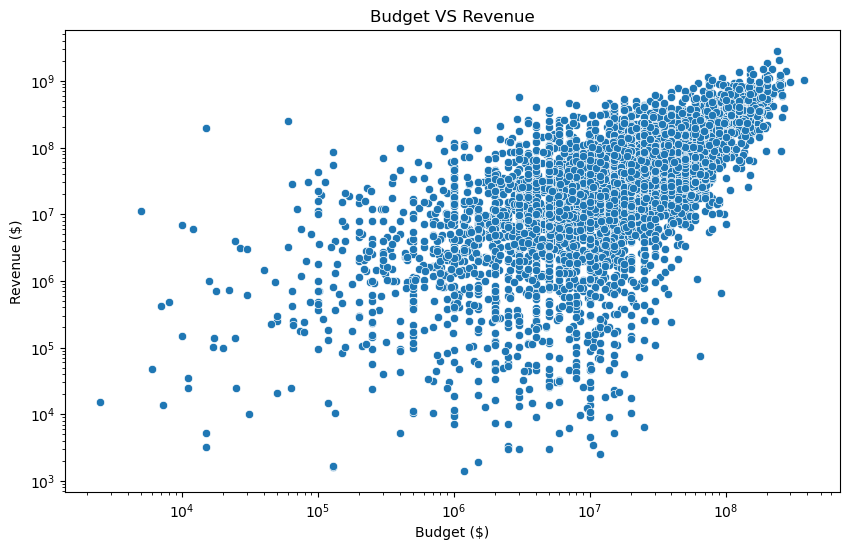

In [4]:
# Our first question was do higher budgets lead to higher revenue or higher profitability ? 
# We can test that first by doing scatterplots.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='budget', y='revenue')
plt.title('Budget VS Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.xscale('log') # We saw in the EDA process that both budget and revenue are right skewed. 
plt.yscale('log')
plt.show()

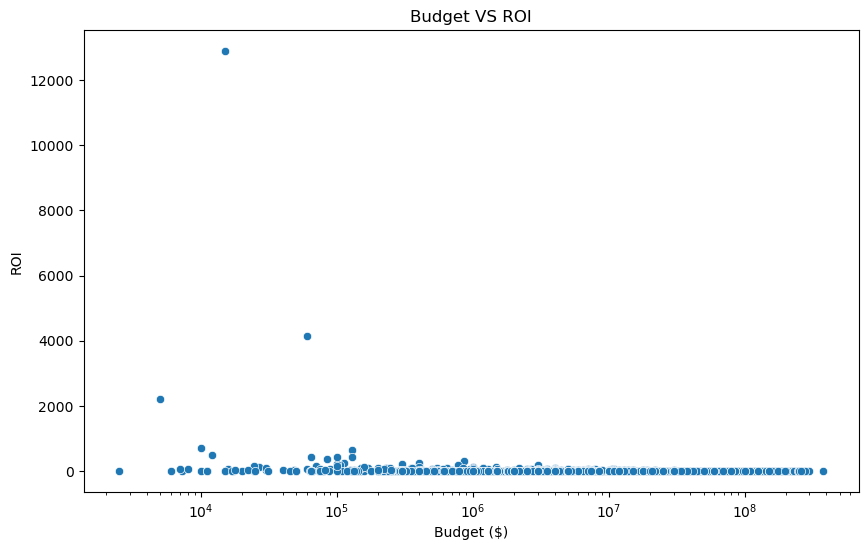

In [5]:
# As expected, we can see a clear trend: higher budgets tends to result in a higher revenue.
# This seems like a logical relationship, as larger investments often allows broader productions. 
# Now let's see if higher budgets also means a better return on investment (ROI).
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='budget', y='roi')
plt.title('Budget VS ROI')
plt.xlabel('Budget ($)')
plt.ylabel('ROI')
plt.xscale('log') 
plt.show()

count     5293.000000
mean         8.089754
std        189.818290
min         -0.999790
25%         -0.200000
50%          1.073707
75%          3.245925
max      12889.386667
Name: roi, dtype: float64
14192    12889.386667
2595      4132.333333
41472     2215.689800
3554       699.000000
4316       652.846154
2248       499.000000
7788       438.616585
31628      425.644100
9461       419.522723
2346       362.047059
1909       310.709965
941        262.157895
3580       249.000000
1873       232.333333
5340       219.000000
1003       189.666667
5206       181.257113
3245       179.180180
7121       167.571429
3226       162.265306
42308      154.842550
11826      128.440706
587        123.242561
1845       116.235147
219        115.708519
7733       114.295243
6913       109.000000
10660      108.850308
5452       107.695652
1865       107.644729
7303       104.882353
11347      100.783310
18338      100.758490
15898      100.531433
8683       100.333333
893         99.044115
7796  

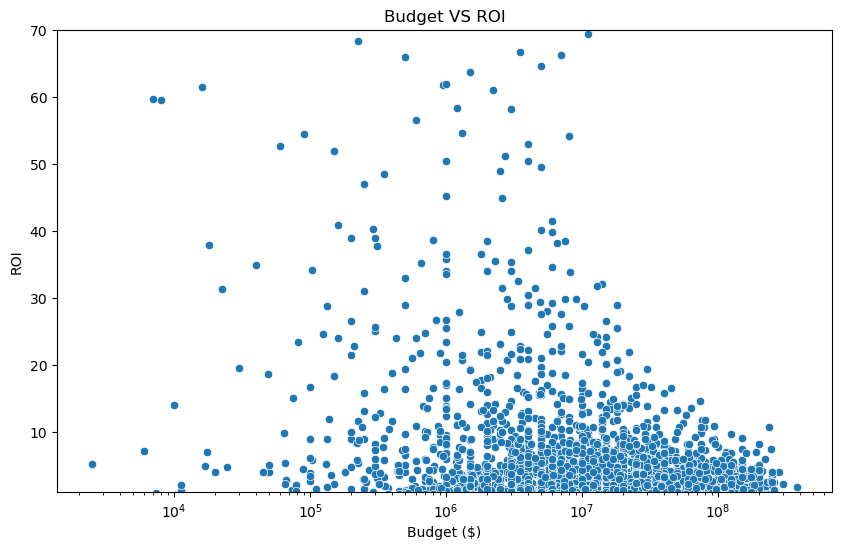

In [6]:
# We observe a fex extremely high ROI values, making the overall distribution hard to read.
# Since our data has already been cleaned these are not necessarily errors or outliers to remove.
# They may be rare case where a lower-budget film had a massive success.
# To better visualize the trend, we will do the scatterplot again using a capped y-axis.
print(df_clean['roi'].describe()) 
# We can clearly see that ROI is extremely skewed with 75% of our data < 3.25 but a std of 189.82
# Let's check the higher top values to see the potential jump in values. 
print(df_clean['roi'].sort_values(ascending=False).head(50)) # ~1% of our sample
# We will take a cap of 70 in roi according to these values.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='budget', y='roi')
plt.title('Budget VS ROI')
plt.xlabel('Budget ($)')
plt.ylabel('ROI')
plt.xscale('log') 
plt.ylim(1,70)
plt.show()

In [7]:
# After capping below the 1%, the scatterplot is more readable and shows no clear linear trend between budget and ROI.
# So we can say for now that higher budget does not constistently yield higher ROI. 
# We may revisit this relationship on a deeper level using regression modeling later in the project.

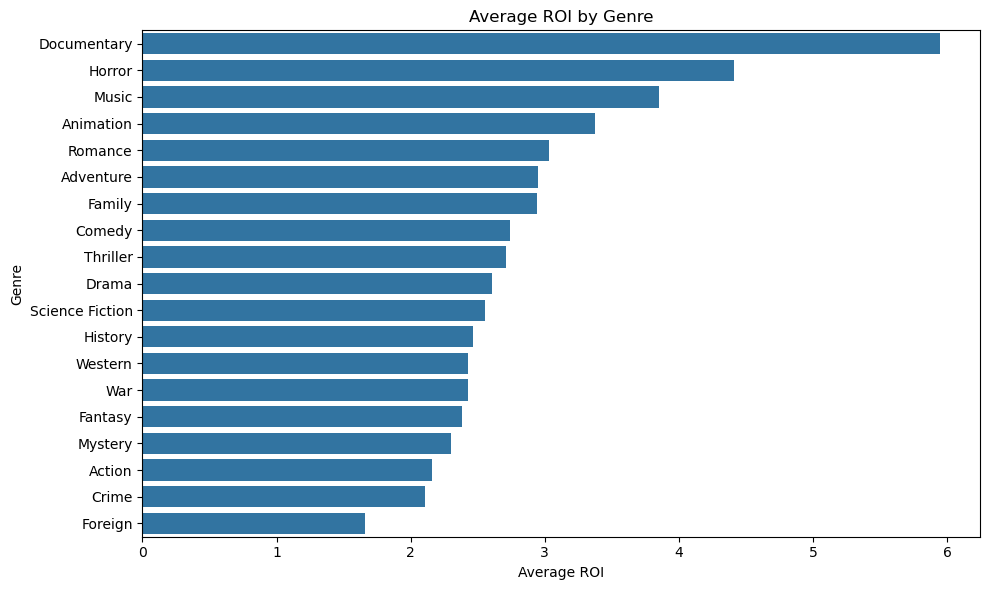

In [8]:
# Our next question was about genres and seeing if some genres are more profitable than others?
# To maintain consistency, we will continue using a 70 cap for ROI as justified before.
df_genres_capped = df_genres[df_genres['roi']<= 70]
avg_roi_by_genre = df_genres_capped.groupby('genres')['roi'].mean().sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_roi_by_genre.values, y=avg_roi_by_genre.index)
plt.title('Average ROI by Genre')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [9]:
# Interestingly Documentary is the genre with the highest average ROI.
# This is likely due to their low production costs and increasing demand for this type of content on streaming platforms
# with for example a surge in popularity for true crimes documentaries in recent years.

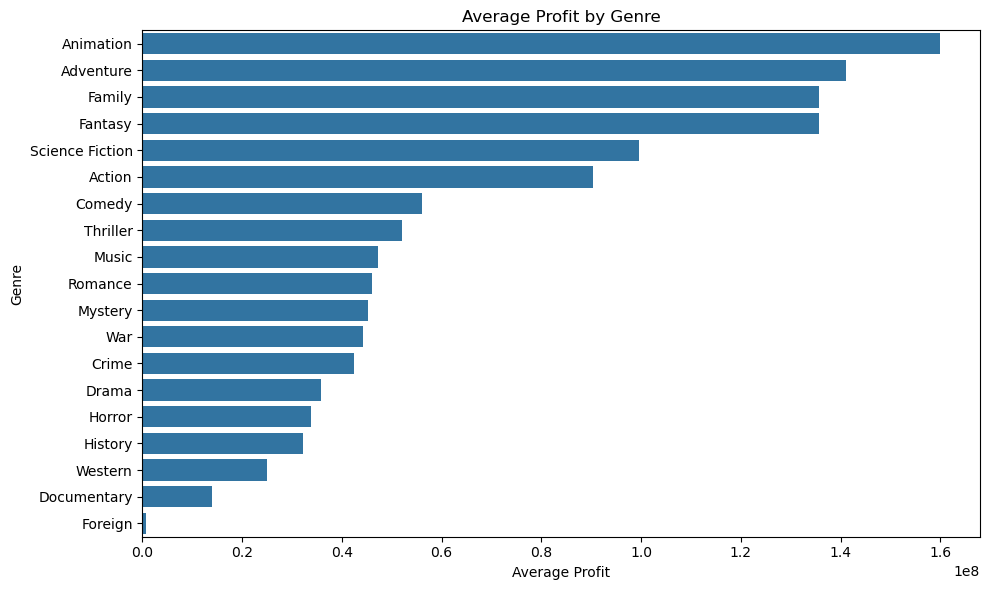

In [10]:
# We can also take a look at pure profit if we're interested in total earnings, rather than efficiency (ROI).
avg_profit_by_genre = df_genres_capped.groupby('genres')['profit'].mean().sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_profit_by_genre.values, y=avg_profit_by_genre.index)
plt.title('Average Profit by Genre')
plt.xlabel('Average Profit')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [11]:
# When looking at total profit rather than ROI, we see a shift in the ranking:  
# Animation here has the highest average profit out of all genres.  
# On the other hand, Documentary which had the highest average ROI, ranks near the bottom in terms of pure profit.  
# This shows the distinction between ROI and pure profit.
# Documentaries are cost-effective, but generate lower overall returns.

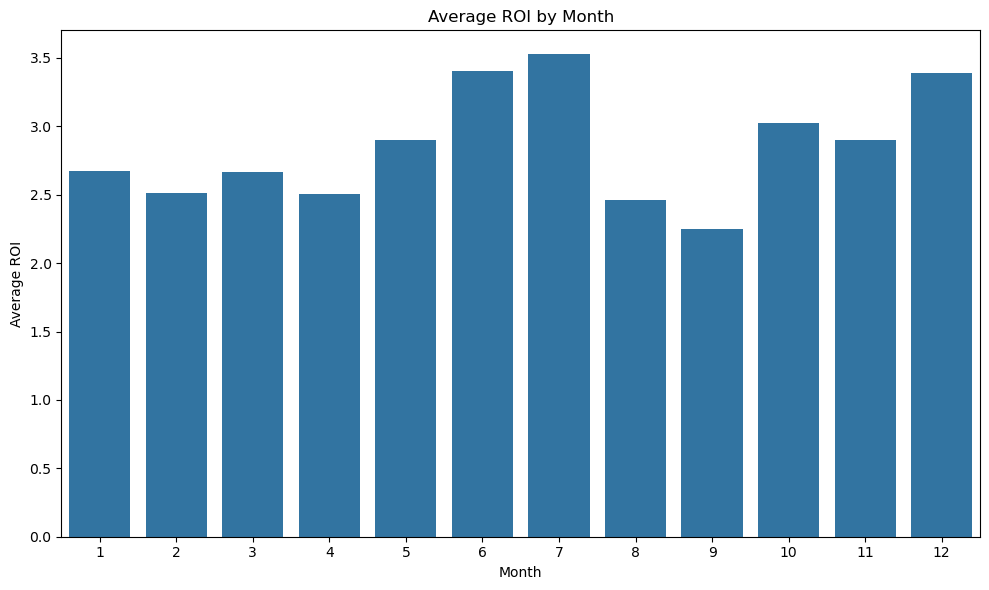

In [12]:
# Next, let's explore whether the seasonality of a film's release date has an impact on profitability.
df_clean['month'] = df_clean['release_date'].dt.month
df_clean_capped = df_clean[df_clean['roi'] <= 70]
avg_roi_by_month = df_clean_capped.groupby('month')['roi'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_roi_by_month.index, y=avg_roi_by_month.values)
plt.title('Average ROI by Month')
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.xticks(ticks=range(0, 12), labels=range(1, 13))
plt.tight_layout()
plt.show()

In [13]:
# The data suggests that a film’s release month does impact profitability.  
# The most profitable months on average are July, June, and December, while September is the lowest.  
# This trend likely reflects the higher performance of films released during holiday periods, such as summer vacations and the Christmas season,  
# compared to less favorable periods like back-to-school months, when audience engagement tends to drop.

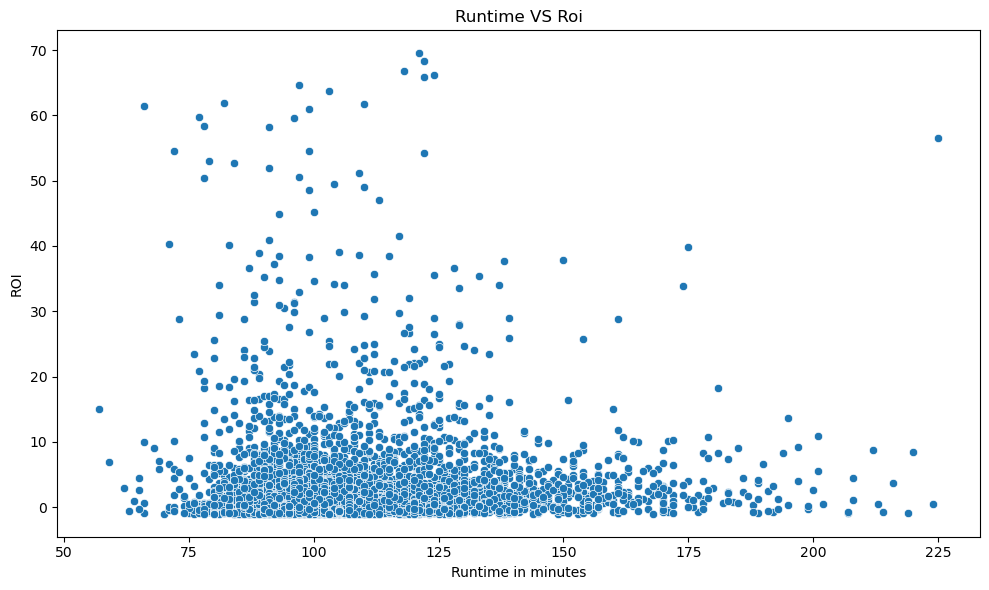

In [14]:
# We can also explore whether a film's runtime has any relationship with its financial performance.  
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean_capped, x='runtime', y='roi')
plt.title('Runtime VS Roi')
plt.xlabel('Runtime in minutes')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

In [15]:
# There does not seem to be clear linear relationship.
# We can check the correlation coefficient.
df_clean_capped['runtime'].corr(df_clean_capped['roi'])

0.0020659338365183895

In [16]:
# The coefficient is very close to 0.
# Runtime is unlikely to be a strong variable in predicting ROI.

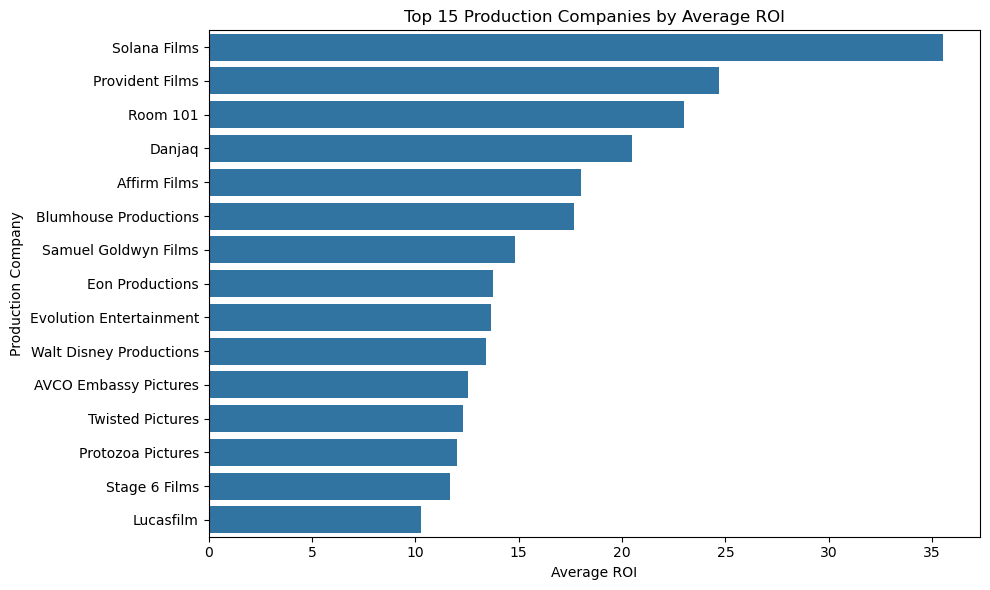

In [17]:
# We can continue and check whether certain production companies produce more profitable movies.
df_companies_capped = df_companies[df_companies['roi']<= 70]
avg_roi_by_company = df_companies_capped.groupby('production_companies')['roi'].mean().sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_roi_by_company.head(15).values, y=avg_roi_by_company.head(15).index) # checking only the top 15
plt.title('Top 15 Production Companies by Average ROI')
plt.xlabel('Average ROI')
plt.ylabel('Production Company')
plt.tight_layout()
plt.show()

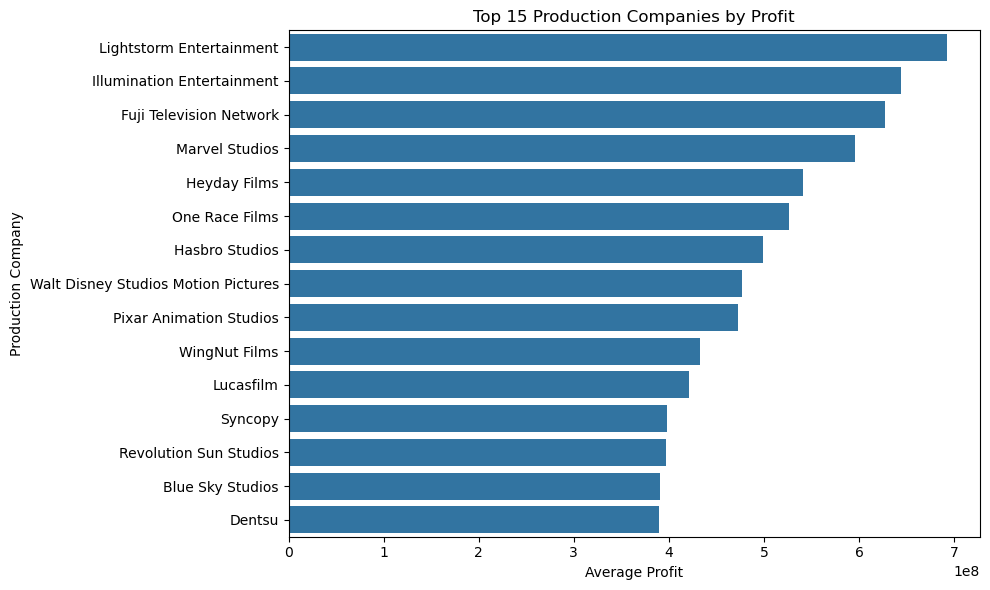

In [18]:
# To put things into perspective, it can be useful to also look at pure profit and not just ROI.
# This helps balance the analysis, as we did with genres.

avg_profit_by_company = df_companies_capped.groupby('production_companies')['profit'].mean().sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_profit_by_company.head(15).values, y=avg_profit_by_company.head(15).index)
plt.title('Top 15 Production Companies by Profit')
plt.xlabel('Average Profit')
plt.ylabel('Production Company')
plt.tight_layout()
plt.show()

In [19]:
# As expected, we observe a shift in the ranking. This shows that companies with high ROI do not
# necessarily generate the highest absolute profits.
# For example, the top company by ROI does not even appear in the top 15 by average profit.
# A more comprehensive view of top-performing production companies could come from cross-referencing
# both ROI and profit metrics.

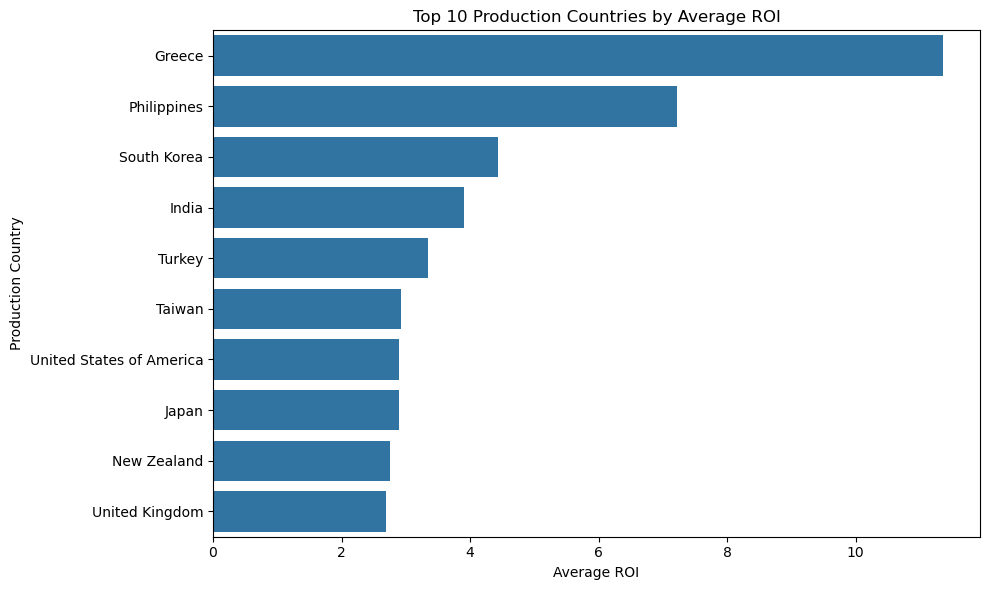

In [20]:
# And even though we observed earlier that the USA dominated in terms of volume, it can be valuable
# to look which countries have the highest ROI in average. 
# This could represent potential opportunities for co-productions and international investments.
df_countries_capped = df_countries[df_countries['roi']<= 70]
avg_roi_by_country = df_countries_capped.groupby('production_countries')['roi'].mean().sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_roi_by_country.head(10).values, y=avg_roi_by_country.head(10).index) # Top 10
plt.title('Top 10 Production Countries by Average ROI')
plt.xlabel('Average ROI')
plt.ylabel('Production Country')
plt.tight_layout()
plt.show()

In [21]:
# At this point, we could look at deeper business driven questions that could drive actionable insights.
# For example are certain genres more profitable during specific months? ( Animation in December, horror in October...)
# We could also add consistency and stability as another aspect to our questions using the standart deviation of ROI. 